# Introduction to simple linear regression

Simple linear regression is a fundamental statistical method used to quantify the relationship between two variables. It allows us to predict an outcome (dependent variable) based on the value of one predictor (independent variable). In this challenge, we will apply simple linear regression to understand how different environmental factors affect the standardised yield of crops.

# Initial data exploration

Before we sow the seeds of our regression model, we need to get to know our soil – the dataset. This dataset contains various factors that might influence a farm's crop yield, from the elevation of the fields to the average temperature they bask in.

Spend some time looking at the data dictionary and start thinking about what could be influencing our crop yield.

# Data dictionary

**1. Geographic features**

- **Field_ID:** A unique identifier for each field (BigInt).
 
- **Elevation:** The elevation of the field above sea level in metres (Float).

- **Latitude:** Geographical latitude of the field in degrees (Float). (DUMMY VARIABLE- the simulation might have created a relationship)

- **Longitude:** Geographical longitude of the field in degrees (Float). (DUMMY VARIABLE- the simulation might have created a relationship)

- **Location:** Province the field is in (Text).

- **Slope:** The slope of the land in the field (Float).

**2. Weather features**

- **Rainfall:** Amount of rainfall in the area in mm (Float).

- **Min_temperature_C:** Average minimum temperature recorded in Celsius (Float).(DUMMY VARIABLE)

- **Max_temperature_C:** Average maximum temperature recorded in Celsius (Float).(DUMMY VARIABLE)

- **Ave_temps:** Average temperature in Celcius (Float).

**3. Soil and crop features**

- **Soil_fertility:** A measure of soil fertility where 0 is infertile soil, and 1 is very fertile soil (Float).

- **Soil_type:** Type of soil present in the field (Text).

- **pH:** pH level of the soil, which is a measure of how acidic/basic the soil is (Float).

**4. Farm management features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Pollution_level:** Level of pollution in the area where 0 is unpolluted and 1 is very polluted (Float).

- **Plot_size:** Size of the plot in the field (Ha) (Float). (DUMMY VARIABLE)

- **Chosen_crop:** Type of crop chosen for cultivation (Text).

- **Annual_yield:** Annual yield from the field (Float). This is the total output of the field. The field size and type of crop will affect the Annual Yield (DUMMY VARIABLE - Removed)

<br>

**5. Target variable**
- **Standard_yield:** Standardised yield expected from the field, normalised per crop (Float). This is independent of field size, or crop type. Multiplying this number by the field size, and average crop yield will give the Annual_Yield.

---

**Important:** Ensure that `data_ingestion.py` file and the `field_data_processor.py` files are stored in the same folder as your notebook, otherwise the data import will fail. The links to the files are below:

[Download files here](https://github.com/EbrahemHassan132/data_validation.git)


In [2]:
# Read the database, and clean the data using the processing modules we built.

import re
import numpy as np
import pandas as pd
from data_processing.field_data_processor import FieldDataProcessor
# from weather_data_processor import WeatherDataProcessor
import logging 

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

config_params = {
    "sql_query": """
            SELECT *
            FROM geographic_features
            LEFT JOIN weather_features USING (Field_ID)
            LEFT JOIN soil_and_crop_features USING (Field_ID)
            LEFT JOIN farm_management_features USING (Field_ID)
            """,
    "db_path": 'sqlite:///Maji_Ndogo_farm_survey_small.db',
    "columns_to_rename": {'Annual_yield': 'Crop_type', 'Crop_type': 'Annual_yield'},
    "values_to_rename": {'cassaval': 'cassava', 'wheatn': 'wheat', 'teaa': 'tea'},
    "weather_csv_path": "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Maji_Ndogo/Weather_station_data.csv",
    "weather_mapping_csv": "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Maji_Ndogo/Weather_data_field_mapping.csv",
    "regex_patterns" : {
            'Rainfall': r'(\d+(\.\d+)?)\s?mm',
            'Temperature': r'(\d+(\.\d+)?)\s?C',
            'Pollution_level': r'=\s*(-?\d+(\.\d+)?)|Pollution at \s*(-?\d+(\.\d+)?)'
            },
}
# Ignoring the field data for now.
field_processor = FieldDataProcessor(config_params)
field_processor.process()
field_df = field_processor.df

# We're not going to use the weather data this time, so we'll ignore it.
# weather_processor = WeatherDataProcessor(config_params)
# weather_processor.process()
# weather_df = weather_processor.weather_df

dataset = field_df.drop("Weather_station", axis=1)

2024-12-24 17:37:33,796 - data_ingestion - INFO - Database engine created successfully.
2024-12-24 17:37:33,937 - data_ingestion - INFO - Query executed successfully.
2024-12-24 17:37:33,938 - data_processing.field_data_processor.FieldDataProcessor - INFO - Sucessfully loaded data.
2024-12-24 17:37:33,941 - data_processing.field_data_processor.FieldDataProcessor - INFO - Swapped columns: Annual_yield with Crop_type
2024-12-24 17:37:34,651 - data_ingestion - INFO - CSV file read successfully from the web.


In [4]:
dataset

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,0.751354,cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,3.996838e-01,2.2,1.069865,cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,3.580286e-01,3.4,2.208801,tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,1.277635,cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,0.832614,wheat,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,885.7,-4.3,33.4,14.55,0.61,Sandy,5.741063,3.286828e-01,1.1,0.609930,potato,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,501.1,-4.8,32.1,13.65,0.54,Sandy,5.445833,1.602583e-01,8.7,3.812289,maize,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,1586.6,-3.8,33.4,14.80,0.64,Volcanic,5.385873,8.221326e-09,2.1,1.681629,tea,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,1272.2,-6.2,34.6,14.20,0.63,Silt,5.562508,6.917245e-10,1.3,0.659874,cassava,0.507595


# Analysis

With our data ready and loaded, it's time to start exploring. 

Our goal is to determine whether any of the features in our dataset are influencing the `Standard_yield` of a farm. If we can figure out what these relationships are, then we can use them to start predicting what future yields will be, based on these features. 

For this analysis, we want to find whether any features have a linear relationship with `Standard_yield` so that we can fit a linear regression model to the data. This is important because if we try and fit a linear regression model to non-linear data, our predictions won't be good.

Any of the features could have an impact on the `Standard_yield`. Let's begin with `Ave_temps`, the average temperature of the region, and its relationship to `Standard_yield`.

Let's start with the basics: a scatter plot.


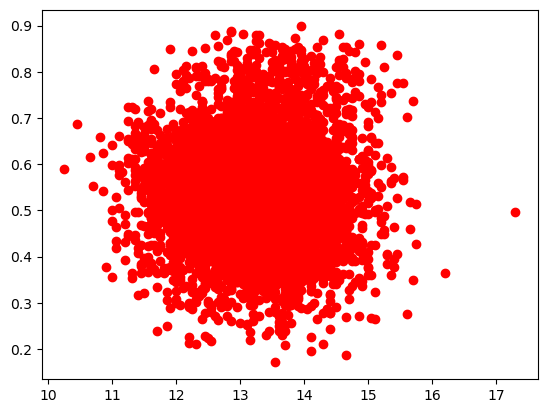

In [6]:
import matplotlib.pyplot as plt

# let's create a scaatter plot between the Standard_yield and Ave_temp

plt.scatter(dataset['Ave_temps'], dataset['Standard_yield'], color='red', marker='o')

It appears that no linear relationship is present but lets check further.

Now, let's write a function to calculate the Pearson correlation coefficient.

We will create a function named `get_correlation` that:
1. Takes a DataFrame and the names of the columns we want to determine the correlation for as parameters (`Ave_temps` and `Standard_yield`).
2. Calculates the Pearson correlation coefficient between these two columns to quantify their linear relationship.
4. Returns the Pearson correlation coefficient.

In [22]:
from scipy.stats import pearsonr

In [23]:
?pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None)
Docstring:
Pearson correlation coefficient and p-value for testing non-correlation.

The Pearson correlation coefficient [1]_ measures the linear relationship
between two datasets. Like other correlation
coefficients, this one varies between -1 and +1 with 0 implying no
correlation. Correlations of -1 or +1 imply an exact linear relationship.
Positive correlations imply that as x increases, so does y. Negative
correlations imply that as x increases, y decreases.

This function also performs a test of the null hypothesis that the
distributions underlying the samples are uncorrelated and normally
distributed. (See Kowalski [3]_
for a discussion of the effects of non-normality of the input on the
distribution of the correlation coefficient.)
The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets.


In [24]:
def get_correlation(dataframe, x, y):
    """
    Returns the correlation between two columns in a dataframe.
    params: 
    dataframe: pandas dataframe
    x: string, column name
    y: string, column name
    returns: float, correlation between the two columns
    """
    correlation,_ = pearsonr(dataframe[x], dataframe[y])
    return correlation

In [25]:
correlation = get_correlation(dataset,'Ave_temps','Standard_yield')
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.006785950289020154


It's essential to visualise our data first; if the data doesn't follow a linear pattern, then a linear regression model may fail to accurately capture the underlying relationship.

From the scatter plot and the correlation analysis we can see that:
  - There is no linear relationship between `Ave_temps` and `Standard_yield`

It's time to shift our gaze from the warmth of the sun to the haze of pollution. Could the levels of pollution, a concern for farmers and environmentalists alike, be an indicator of our yields?

Let's begin by fitting a simple linear regression model, to try and capture the linear relationship between these columns.

We will create a function named `fit_linear_regression_model` that:
1. Takes in a DataFrame and the names of two columns.
2. Fits a linear regression model to the data.
3. Returns the model, the model predictions and the actual y-values.


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
def fit_linear_regression_model(dataframe, x, y):
    """
    Fits a linear regression model to the data.
    params:
    dataframe: pandas dataframe
    x: string, column name
    y: string, column name
    returns: tuple, (model, y_gen, y_true)
    """
    lm = LinearRegression()
    lm.fit(dataframe[x].values.reshape(-1,1), dataframe[y])
    y_gen = lm.predict(dataframe[x].values.reshape(-1,1))

    return lm, y_gen, dataframe[y]

In [28]:
model, predictions, y_values = fit_linear_regression_model(dataset, 'Pollution_level', 'Standard_yield')
print(f"Model: {model}")
print(f"Predictions: {predictions}")
print(f"Actual Y-Values: {y_values}")

Model: LinearRegression()
Predictions: [0.5540956  0.50920888 0.51515565 ... 0.56626844 0.56626844 0.52896886]
Actual Y-Values: 0       0.577964
1       0.486302
2       0.649647
3       0.532348
4       0.555076
          ...   
5649    0.554482
5650    0.438194
5651    0.800776
5652    0.507595
5653    0.453064
Name: Standard_yield, Length: 5654, dtype: float64


Linear regression models only work well if our data is in fact linear. So, lets create a scatter plot to visualise the relationship between pollution and crop yields. In addition to this, let's use the predictions from the model we fit to add the line of best fit to our scatter plot.

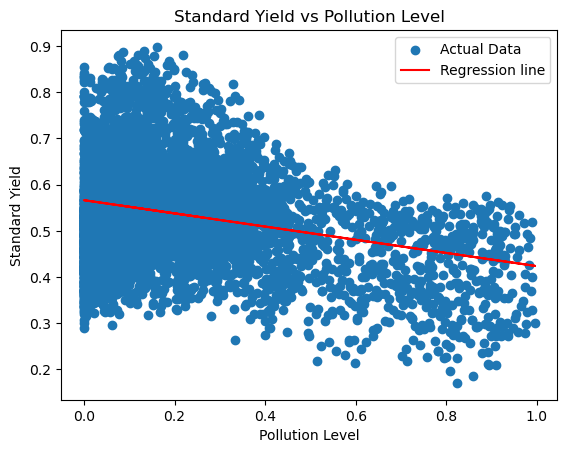

In [33]:
plt.scatter(dataset['Pollution_level'], dataset['Standard_yield'], marker='o')
plt.plot(dataset['Pollution_level'], predictions, color='red')
plt.xlabel('Pollution Level')
plt.ylabel('Standard Yield')
plt.title('Standard Yield vs Pollution Level')
plt.legend(['Actual Data','Regression line' ])
plt.show()

Now, use the get_correlation() function that we defined earlier to test the correlation between `Pollution_level` and `Standard_yield`.

In [34]:
Pollution_correlation = get_correlation(dataset,'Pollution_level','Standard_yield')
print("Pearson correlation coefficient:", Pollution_correlation)

Pearson correlation coefficient: -0.28576096462105427


  - There is a weak inverse linear relationship between pollution and yield

We can also gain a better understanding of our model by examining the slope and intercept.

We will create a function named `get_slope_intercept` that:
1. Inputs the `model` we fitted and calculates the slope and intercept of the line of best fit.
2. Return the slope and intercept as a tuple.

In [36]:
def get_slope_intercept(model):
    """
    Returns the slope and intercept of a linear regression model.
    params:
    model: sklearn.linear_model.LinearRegression
    returns: tuple, (slope, intercept)
    """
    slope = model.coef_[0]
    intercept = model.intercept_
    
    return slope, intercept

In [37]:
slope, intercept = get_slope_intercept(model)
print("Slope:", slope)
print("Intercept:", intercept)

Slope: -0.1427617720986606
Intercept: 0.5662684415393379



What does the slope tell us about the strength of the relationship between pollution and yield? Also, what can we learn from the y-intercept?

  - The slope value indicates a weak relationship 
  - The slope sign indicates a reversed relationship 
  - The intercept means thar when the pollution is 0 the yield is 0.5662684415393379

When we look at the scatterplots of `Standard_yield` with `Ave_temps` and `Pollution_level`, it appears that pollution level might have a more linear relationship.  This means that we could potentially use a simple linear regression model to make predictions about the yield of a farm based on its pollution level. However, before we do this we need to further assess the strength of the linear relationship between `Pollution_level` and `Standard_yield`. 

Let's assess our model's performance using R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

We will create a function named `calculate_evaluation_metrics` that:
1. Takes the predictions and y-values from our fitted model as input.
2. Calculates and returns the R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) of the model's performance.

In [46]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [47]:
def calculate_evaluation_metrics(y_true, y_pred):
    """
    Calculates the evaluation metrics for a regression model.
    params:
    y_true: np.array, true values
    y_pred: np.array, predicted values
    returns: tuple, (mse, rmse, mae, r2_score)
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    R_squared = r2_score(y_true, y_pred)

    return mse, rmse, mae, R_squared

In [48]:
mse, rmse, mae, R_squared = calculate_evaluation_metrics(y_values, predictions)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R2 Score:", R_squared)

Mean Squared Error: 0.011477732254034844
Root Mean Squared Error: 0.10713417873878926
Mean Absolute Error: 0.08554642090904992
R2 Score: 0.08165932890115568


- The low R-squared means that the variation in X does not fully descripe the variation in y
- The low MAE indicates that there is no large difference between the predicted values and the mean